In [1]:
import time
import itertools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from goods_duty_optimizer import *

In [2]:
plt.rcParams["figure.figsize"] = (12,6)

In [3]:
REPEATS = 5
ITERATIONS = 1000
SOLVER_SETTINGS = dict(
    population_size=10,
    goods_mutations=2,
    trucks_mutations=1,
    elite_sites=2,
    normal_sites=3,
    elite_site_size=7,
    normal_site_size=2
)

In [4]:
def results(solver):
    """ Yields next solution of given generator. """
    solver.init_population()
    while True:
        solver.simulate_population()
        yield solver.current_cost()

def parameter_results(p_name, p_values, problem):
    """ Returns results for given values of given parameter. """
    out = []
    
    for val in p_values:
        settings = SOLVER_SETTINGS.copy()
        settings[p_name] = val
        
        solver = BeesSolver(problem, **settings)
        
        out.append(list(itertools.islice(results(solver), ITERATIONS)))
    
    return out

def parameter_min_max(p_name, p_values, problem):
    out = []
    
    for val in p_values:
        settings = SOLVER_SETTINGS.copy()
        settings[p_name] = val
        
        solver = BeesSolver(problem, **settings)
        
        costs = [
            calculate_cost(solver.find_best_solution(stop_iterations(ITERATIONS)), problem)
            for _ in range(REPEATS)
        ]
        
        out.append((min(costs), max(costs)))

    return out
        
def plot_parameter_impact(p_name, p_values, problem):
    """ Plots changes in cost depending on value of parameter. """
    data = parameter_results(p_name, p_values, problem)
    
    for val, d in zip(p_values, data):
        plt.plot(d, label=val)
    
    plt.title(p_name)
    plt.xlabel('iterations')
    plt.ylabel('cost')
    plt.legend()
    
    return [d[-1] for d in data]

## Sample problems

In [5]:
problem_small  = Settings(3, 5, 5, 15, 0.66, np.array([[7.2972688 , 3.07600153, 7.03814591, 3.49849847, 7.39474274], [4.2274463 , 5.58392443, 9.85180314, 2.1577789 , 7.39375377], [5.22685312, 9.40056131, 9.40173245, 5.6917192 , 2.25588407]]), np.array([35.66143367, 44.77619474,  4.76035771]), np.array([ 1, 10, 17,  9,  5]))
problem_medium = Settings(10, 20, 15, 29, 6.93, np.array([[7.17064844, 9.83560145, 0.9310022 , 3.44203383, 6.28724979, 5.33391792, 2.00564016, 9.85282857, 0.21997689, 3.66736193, 3.46432444, 1.79738866, 6.10358484, 0.96285537, 0.17112034, 3.88245263, 6.41174985, 0.10258407, 7.045462 , 6.85703938], [7.3284445 , 9.07260752, 5.27015454, 7.31526727, 0.50283254, 9.96774068, 7.30406557, 6.71403487, 1.63120591, 0.18635106, 4.90828965, 8.31034218, 7.11468999, 6.8651796 , 6.79433319, 5.56159257, 6.72433312, 5.23197735, 3.31775687, 5.48159262], [2.58981781, 7.74790182, 9.91611902, 6.98212565, 6.24907205, 6.92715075, 5.60712273, 1.44138822, 3.83702719, 2.11665893, 5.48594587, 4.09770082, 5.50506231, 2.89831797, 6.09451873, 1.1862065 , 4.28477603, 6.85224201, 0.97451134, 6.4111078 ], [5.94823125, 4.64340721, 1.21410616, 1.40941594, 8.23008667, 0.96613748, 2.9255264 , 0.69989015, 9.59949328, 3.08530355, 6.11729588, 2.70386384, 3.35732327, 7.76333466, 5.29812188, 0.20468567, 9.65097936, 7.38766244, 4.3628188 , 9.46591194], [1.66878129, 5.20703238, 7.18336591, 2.29438251, 6.7509428 , 0.41410622, 3.9494545 , 6.80809512, 7.43182462, 5.87393869, 8.85137439, 7.59762062, 2.81380059, 9.79251724, 5.80541881, 3.27641622, 7.68360725, 9.24590516, 7.02376902, 9.68995014], [7.44655263, 8.01113184, 0.58602807, 1.03841231, 0.98826283, 2.46740913, 6.94296502, 3.79222862, 9.3781875 , 4.23172533, 2.71213262, 5.95750483, 6.77114026, 8.38564029, 7.97406842, 0.20026807, 6.45560453, 7.03786471, 1.06620068, 2.7328912 ], [0.55972839, 6.92089134, 7.13950643, 8.67303104, 2.23069277, 6.56820849, 9.87340558, 7.94051897, 8.44841483, 3.29076794, 8.66388335, 7.40888064, 0.44472302, 8.13033411, 5.34264492, 5.01827618, 1.7714324 , 6.34347725, 5.98724308, 1.89772582], [9.95505154, 6.57587902, 6.76128478, 3.80149266, 0.25412853, 6.73427699, 7.12260978, 7.77860249, 6.87914321, 2.58900562, 5.89956917, 5.41553731, 4.76849879, 5.63792319, 2.89983283, 3.45157327, 4.30542503, 2.5876976 , 8.87341794, 2.6353531 ], [8.08832776, 1.81761103, 4.91366297, 4.08586304, 7.70002856, 5.9563865 , 3.02843932, 7.78960288, 2.75770876, 4.9428191 , 1.61499824, 6.81496819, 9.81636561, 3.95311673, 5.92293897, 6.95094665, 3.55009371, 9.96191071, 7.81848711, 3.97931329], [1.45220175, 1.63045776, 0.41903788, 3.96538543, 3.18980213, 9.4366237 , 1.25222265, 3.78416161, 5.83663622, 7.63170459, 5.45143245, 3.01757521, 7.58075094, 0.80025577, 6.35092499, 5.13027939, 4.98585313, 0.98878149, 0.29188081, 8.10103093]]), np.array([14.95259721, 46.08148362, 19.22919043, 22.18166752, 11.93882857, 40.46191295, 14.14931785, 13.07559447, 17.02139664, 39.62146746]), np.array([19, 5, 18, 5, 3, 13, 5, 5, 16, 12, 19, 8, 1, 3, 11, 8, 8, 7, 6, 12]))
problem_big    = Settings(20, 40, 25, 25, 8.93, np.array([[4.72355563, 1.37761309, 9.79616514, 6.30702095, 5.92707645, 6.5640839 , 1.18019166, 8.90784688, 1.92623465, 3.6362721 , 4.65470549, 9.91061371, 1.95907654, 6.59662718, 9.55532795, 5.54003081, 6.73091043, 7.67064431, 2.60212478, 5.48012587, 0.99956034, 1.93671529, 9.76945636, 4.96140834, 5.34070779, 9.07626377, 3.31363645, 0.57220782, 3.30965219, 4.36020091, 2.81528362, 1.29653109, 3.12756117, 2.53380719, 4.69127726, 1.16420472, 4.07032115, 3.92199805, 6.09740193, 9.22536819], [8.98602879, 5.22827513, 9.95005235, 7.19694006, 8.6539763 , 4.3736572 , 1.62978188, 9.16538342, 2.84582577, 9.02097289, 3.68118233, 0.19477681, 7.38024239, 7.04137962, 2.7410405 , 4.80170362, 3.66841119, 1.38334548, 8.47778583, 3.80075988, 7.69268616, 4.06879094, 9.80943069, 8.28619864, 7.65333313, 9.98472726, 1.75586858, 4.10538259, 2.05950415, 4.75574652, 8.94687025, 7.72316071, 3.55071382, 2.31325126, 1.37336703, 5.15628615, 8.38853176, 5.34171303, 2.540459 , 0.47120156], [1.52942254, 1.22070932, 3.90211183, 5.05048584, 8.42967065, 2.96300099, 2.99463174, 4.99246212, 5.8943439 , 9.80130701, 7.43356435, 3.75755361, 8.11383827, 4.71261982, 3.83441039, 7.67508173, 4.26365448, 2.86497557, 0.1071801 , 1.3586546 , 9.37283631, 1.00331447, 9.9784652 , 3.83979676, 4.8964066 , 1.05999535, 4.21248025, 3.05024921, 4.39010894, 4.38901101, 1.02641919, 3.63184645, 6.18357462, 3.17217079, 8.99476299, 9.98614742, 6.09973963, 3.23239839, 1.32197255, 7.24587192], [7.14575807, 7.80682192, 8.93168224, 0.5297268 , 6.00401186, 6.71244083, 6.17089844, 2.37314192, 2.35767597, 9.30033337, 3.94901296, 5.0031193 , 5.38611644, 1.92196505, 6.87416891, 1.83603849, 4.73034438, 6.25095117, 1.97382542, 9.78263841, 1.54465384, 0.4816091 , 0.66068567, 3.28875421, 8.61370354, 4.36998258, 6.9244932 , 0.72486131, 7.39708858, 7.01105148, 1.27154375, 2.82562798, 3.40362224, 2.85183135, 7.54159836, 7.6706671 , 3.70916852, 7.48154981, 1.1688227 , 9.52499803], [5.79083227, 4.58955936, 8.96772846, 6.47031156, 5.67264914, 0.15918122, 3.74901602, 9.30071833, 5.104432 , 8.32699109, 4.03331248, 3.0225882 , 7.82080851, 5.99992588, 5.98640013, 1.69209939, 4.74965142, 5.04730439, 6.14304074, 2.72675007, 5.51581982, 7.99941714, 9.50367195, 4.20056059, 2.1282122 , 8.49132911, 7.17396707, 1.48603748, 6.59518156, 6.50333929, 5.00841187, 3.4959443 , 9.47488248, 8.45338604, 1.14621464, 9.38296057, 4.13767188, 8.03868273, 1.768445 , 3.46782943], [5.81914621, 0.64875904, 8.83076712, 3.27254708, 2.72790962, 0.56055054, 6.34461669, 6.49148623, 9.57641046, 9.48425554, 1.99806651, 4.66757184, 2.03578191, 0.40699113, 1.50625439, 1.11442585, 5.39958826, 9.6279658 , 3.57698438, 5.085014 , 9.90174051, 3.93585626, 9.91103741, 2.14120034, 1.60859044, 9.73197883, 0.84562783, 8.50990092, 6.941402 , 9.89420957, 0.13352347, 6.13448521, 3.03257788, 3.65333146, 5.89019486, 1.91178354, 8.52144891, 6.2587893 , 9.99608327, 2.77766961], [5.28680973, 5.82234202, 8.74715916, 4.06700824, 8.58453533, 8.7257241 , 2.18041824, 8.11495729, 7.82544395, 9.99753371, 3.8040454 , 2.72237384, 5.27964782, 0.9393488 , 5.28093482, 6.30130905, 9.8565793 , 8.95313105, 0.57560006, 0.71076745, 3.2242768 , 8.5364013 , 7.4559812 , 3.98343701, 9.32359934, 9.54147674, 3.26476688, 4.03021467, 9.23360247, 0.34530919, 4.33547007, 0.43201868, 1.85034785, 9.92429454, 9.0717806 , 5.34799824, 0.94665581, 2.75342994, 1.40791187, 3.04305564], [0.5924702 , 8.46730731, 5.06527718, 6.91835433, 1.26041314, 9.68008382, 7.21159767, 5.19219712, 3.42220445, 0.7334334 , 8.08288372, 1.22500441, 2.55221078, 6.26452518, 9.06007579, 4.81932035, 0.42672773, 9.97232711, 3.56909757, 8.82626271, 3.4237865 , 7.01611101, 7.62346237, 8.79340212, 4.75050269, 4.45260712, 4.26316127, 2.66254231, 0.54031722, 8.5706293 , 5.15117367, 5.67137797, 4.86747241, 3.3967781 , 3.79945122, 1.10907804, 7.42127346, 6.32747288, 4.49300651, 7.47014543], [4.44479632, 1.5511077 , 7.18867257, 7.3078286 , 2.11988443, 7.5278498 , 4.1010632 , 0.41671232, 8.96826166, 4.3776893 , 3.35496661, 3.52361811, 7.58191824, 2.03783869, 8.36429453, 4.29199731, 4.16382176, 7.23106196, 6.48082166, 0.54113611, 4.78387022, 1.77469165, 7.59943506, 0.1398729 , 9.1238959 , 7.92002074, 8.94859961, 3.64804244, 4.33513797, 5.312534 , 4.89775136, 2.21255712, 4.90913322, 7.73111705, 0.16568571, 0.15720436, 6.82935209, 0.19543023, 3.6886899 , 9.97696308], [1.99158968, 1.49386827, 6.98466474, 1.9818693 , 6.08039718, 0.77977512, 5.61241602, 0.10519149, 3.26129434, 0.64110058, 3.48056781, 7.56398712, 3.63477251, 6.06029201, 6.56044107, 9.31728679, 5.58707875, 7.02896631, 7.41152855, 4.11907059, 3.12485191, 9.5833259 , 8.44415407, 1.22788055, 3.14624923, 8.35517087, 1.13370775, 7.31879152, 7.0625161 , 9.62567392, 8.70062968, 4.89691925, 8.8419333 , 6.53053663, 2.01640419, 4.37493639, 6.64555099, 6.0939553 , 3.72447974, 1.44878423], [5.1765484 , 7.44223395, 3.34482954, 9.07002275, 3.10004681, 5.84498586, 3.02115427, 9.82716854, 8.98331816, 6.83293716, 6.76930944, 4.5125003 , 9.01360955, 1.27208736, 0.46783312, 2.2176013 , 0.52505297, 7.69344476, 5.84875474, 1.33610072, 4.84029992, 8.99272832, 9.289173 , 7.78293271, 3.22240486, 6.91538137, 6.17300125, 6.16240736, 5.91931795, 4.75675393, 0.75101573, 3.83515618, 3.80345305, 8.53087452, 2.63679425, 4.57578768, 2.90478018, 3.51348876, 4.2328532 , 4.31264813], [8.46227792, 1.85502556, 5.59191764, 3.26037821, 6.61951177, 8.39326094, 5.75513888, 3.0106326 , 4.3061952 , 5.97283447, 3.99646504, 3.00802151, 6.60909553, 0.3751657 , 5.77227961, 1.96489649, 7.05798716, 2.62983274, 0.92752265, 2.78006605, 8.62880551, 6.96664879, 3.48979899, 4.0755844 , 1.16811713, 2.33243621, 3.81295205, 2.49940063, 2.96976581, 7.26706293, 4.46136256, 1.49422187, 4.14166359, 6.95631887, 0.99936314, 8.1060312 , 4.51491562, 2.68603486, 3.68721164, 8.33417672], [5.86243537, 2.36806334, 0.78119241, 0.70107623, 2.22912311, 8.63274824, 6.89850006, 9.77151252, 3.43400596, 0.9090059 , 5.42334569, 6.41408018, 4.08586204, 4.89837163, 5.81858037, 6.63594683, 5.63764464, 8.16631572, 4.77432205, 5.77000571, 3.91226804, 2.02567864, 5.57273038, 5.70147486, 5.78405805, 9.72998551, 5.00163765, 0.38304951, 1.18353865, 3.0309986 , 6.06766102, 9.3127 , 0.48156639, 4.59667469, 6.94515288, 6.58722262, 6.6260555 , 6.30763787, 6.99703504, 3.80131507], [6.41227936, 6.30440497, 0.49321986, 3.00196757, 1.80546091, 7.01474971, 4.0208963 , 7.07543112, 1.66547904, 5.83283672, 6.67334475, 4.56545357, 8.89130677, 1.32537243, 2.31321045, 2.74796292, 7.77490304, 9.55521133, 9.72428647, 5.6408397 , 9.53139666, 2.50877788, 1.02219318, 6.63873088, 4.43749351, 4.48000157, 1.73411594, 4.61923433, 0.32001696, 5.32778822, 1.02220987, 9.02084834, 8.27254714, 1.36472018, 3.59623123, 4.74704603, 3.15609901, 0.71523137, 3.7684803 , 8.30557232], [4.86459624, 7.78266469, 5.83024945, 3.39633677, 0.48980599, 9.57345308, 6.40304663, 8.17477696, 4.73099114, 8.75627674, 6.02229822, 6.55859807, 5.15905723, 0.24635709, 2.93555871, 4.89353205, 5.13698327, 8.62444396, 9.84074788, 6.09111877, 3.38299762, 5.07351352, 6.81710456, 5.55487887, 2.12032527, 2.40467064, 9.84436669, 7.9003858 , 4.8434919 , 9.77573855, 8.01537091, 5.56263592, 5.76330698, 7.71610812, 2.0814663 , 5.49894101, 1.81466328, 7.88151081, 1.97163177, 1.03615341], [8.48091193, 4.34597388, 3.1099048 , 9.45298368, 1.06968516, 6.4132341 , 7.53288271, 5.09175793, 5.70352834, 6.08152782, 9.69834363, 5.9585924 , 9.23972141, 6.02141744, 8.14005164, 6.46156815, 6.42238967, 9.82445735, 3.56784751, 9.77858558, 2.81802029, 0.81788172, 8.29416033, 3.32922807, 0.24420344, 6.87314638, 9.04707958, 9.13788466, 9.82698494, 4.96733075, 1.60338049, 6.07197467, 0.12145498, 9.23069777, 3.828065 , 7.29684331, 9.80829428, 1.99943361, 6.04672056, 0.59155426], [9.29541642, 9.89009564, 0.41882734, 5.4605273 , 2.81780333, 1.47214252, 2.7576733 , 8.99687043, 5.22130794, 9.9837794 , 4.85998414, 8.19168701, 2.20795536, 3.34233316, 1.06377119, 4.9158924 , 0.7536603 , 4.0065469 , 0.60981279, 9.31185121, 4.51078035, 9.21777886, 7.36452777, 3.57373929, 8.06839154, 5.47554542, 1.24070467, 1.00018007, 8.74209092, 6.98538462, 8.29568057, 5.94016466, 8.54915929, 0.44825688, 6.43727512, 3.33969166, 1.97229766, 0.72454478, 8.51713361, 0.57230284], [6.39413337, 9.09487698, 4.72558926, 7.67676361, 3.88297567, 7.55683116, 1.86430469, 8.98438158, 5.56948834, 2.47056209, 9.29179782, 2.70061538, 9.50152639, 6.93832759, 7.5345299 , 6.94230349, 4.92646652, 6.64574009, 0.47200831, 8.4365869 , 5.88313393, 1.21209567, 3.69345242, 9.84107016, 2.90377098, 9.01600095, 6.34094627, 7.87780999, 2.09029003, 3.45756156, 7.38299536, 1.94603321, 5.50804439, 4.90418276, 2.81206621, 4.14322692, 1.31459269, 5.66870991, 1.40668123, 1.51805163], [6.72563034, 1.28135704, 9.45469587, 9.25742871, 3.31908054, 5.77297282, 5.20581874, 9.68115114, 6.35706487, 1.63366445, 5.99325652, 1.34408144, 5.61014991, 4.11877773, 4.296383 , 1.85108299, 4.41757942, 2.83459387, 9.01337617, 0.40653042, 1.99570075, 1.23056889, 8.17075269, 2.24345763, 4.75966366, 6.05479128, 1.07595332, 3.3040951 , 8.70689525, 6.64274267, 9.87698515, 5.11756192, 0.64348695, 3.00162257, 0.61997857, 3.86284035, 3.86176348, 8.71145129, 0.29456175, 1.62896504], [8.8535996 , 9.26239637, 5.26493544, 8.75174753, 9.79214929, 1.4495915 , 5.09150478, 5.619132 , 5.50909781, 3.88709029, 8.83242104, 0.92148456, 4.48764753, 1.05797139, 0.33957916, 4.61743217, 5.66189503, 3.44770911, 0.43702303, 5.21199856, 3.13928037, 1.20400885, 4.01188425, 9.54539858, 1.71260486, 5.49129435, 9.51145276, 5.46948159, 4.63475136, 5.32670178, 3.00956683, 2.83361409, 4.45347705, 1.97228739, 9.18249452, 5.05208281, 7.7540262 , 8.08767768, 0.99851665, 9.76253592]]), np.array([19.30571392, 39.4897371 , 9.81984661, 18.39763804, 1.13390118, 48.75551336, 13.29838501, 11.23969374, 27.40063468, 18.61431032, 41.70159278, 40.71259729, 20.84722091, 29.27616748, 34.88688148, 29.74359489, 26.82741277, 32.52301601, 30.42802272, 41.82232066]), np.array([ 2, 7, 9, 13, 5, 5, 18, 1, 14, 14, 7, 6, 8, 10, 13, 1, 1, 3, 16, 4, 2, 7, 13, 15, 14, 1, 7, 7, 15, 11, 18, 15, 12, 12, 14, 19, 10, 9, 11, 9]))
problem_duties = Settings(3, 3, 3, 1000, 0.0, np.array([[1.0, 10.0, 10.0], [10.0, 1.0, 10.0], [10.0, 10.0, 1.0]]), np.array([1.0, 1.0, 1.0]), np.array([100.0, 100.0, 100.0]))
problem_dist   = Settings(3, 1, 3, 10, 1.0, np.array([[0.0], [0.0], [0.0]]), np.array([10.0, 1.0, 10.0]), np.array([25.0]))

problems = [problem_small, problem_medium, problem_big, problem_duties, problem_dist]
problems_names = ['small', 'medium', 'big', 'duties', 'distances']

In [6]:
pd.DataFrame([p[:5] for p in problems], index=problems_names, columns=['crossings', 'goods', 'trucks', 'truck capacity', 'fuel cost'])

,crossings,goods,trucks,truck capacity,fuel cost
small,3,5,5,15,0.66
medium,10,20,15,29,6.93
big,20,40,25,25,8.93
duties,3,3,3,1000,0.00
distances,3,1,3,10,1.00


## Tests of problems

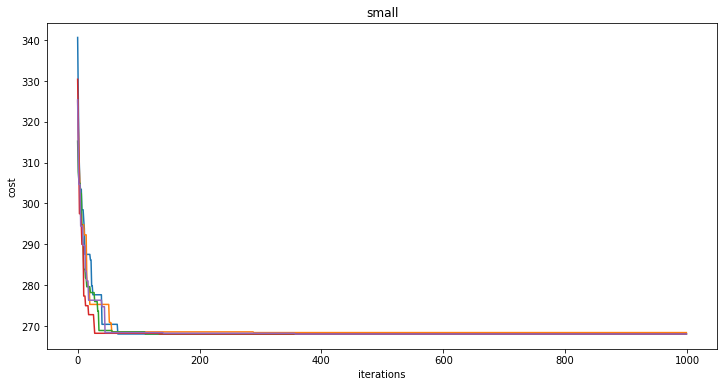

small [3.70517635345459, 3.6318986415863037, 3.6017818450927734, 3.6289515495300293, 3.6304047107696533]
small [268.05918056019993, 268.3999121802, 268.05918056019993, 268.05918056019993, 268.05918056019993]


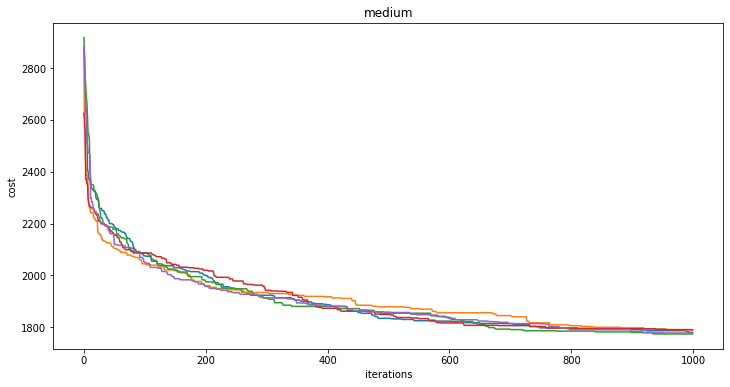

medium [4.989959001541138, 4.649771213531494, 4.831242322921753, 4.639557600021362, 4.676046848297119]
medium [1780.2510812207, 1789.7921820323002, 1774.0643934588998, 1790.4368901419, 1775.8858153259]


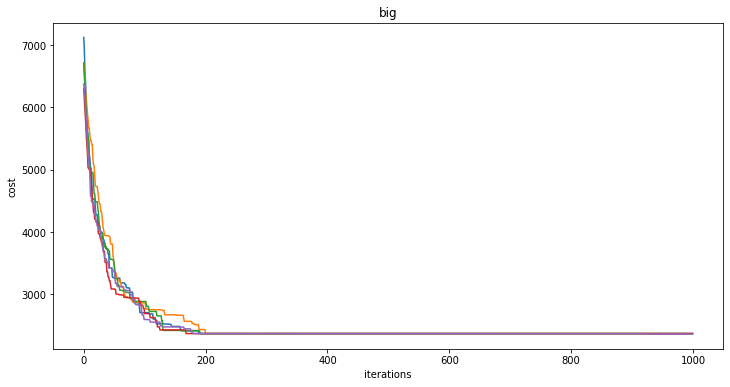

big [5.971025466918945, 5.896855115890503, 5.9534735679626465, 5.916247844696045, 6.046722412109375]
big [2372.5904384949995, 2372.5904384949995, 2372.5904384949995, 2372.5904384949995, 2366.1547382449]


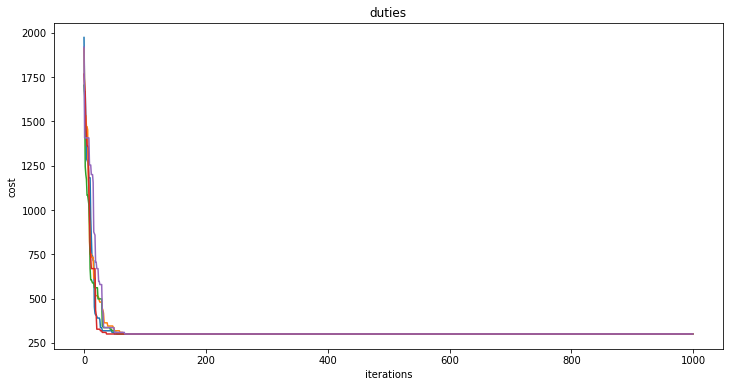

duties [3.555027961730957, 3.542794942855835, 3.567960500717163, 3.5821080207824707, 3.517331838607788]
duties [300.0, 300.0, 300.0, 300.0, 300.0]


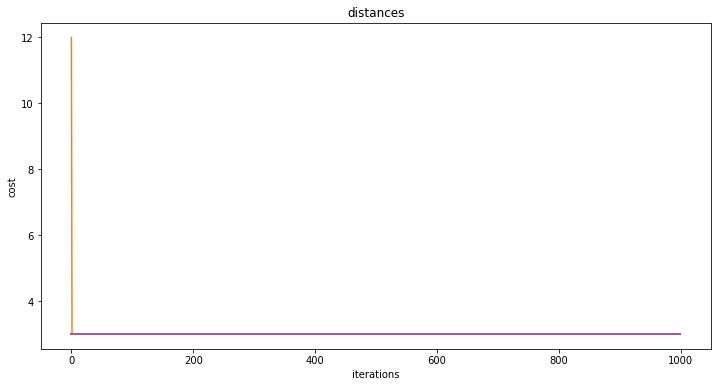

distances [3.469874382019043, 3.447925567626953, 3.404749631881714, 3.4269065856933594, 3.5265471935272217]
distances [3.0, 3.0, 3.0, 3.0, 3.0]


In [7]:
for problem, problem_name in zip(problems, problems_names):
    
    solver = BeesSolver(problem, **SOLVER_SETTINGS)
    
    times = []
    costs = []
    
    for _ in range(REPEATS):
        
        t = time.time()
        data = list(itertools.islice(results(solver), ITERATIONS))
        t = time.time() - t
        
        plt.plot(data)
        times.append(t)
        costs.append(solver.current_cost())
    
    plt.title(problem_name)
    plt.xlabel('iterations')
    plt.ylabel('cost')
    plt.show()
    
    print(problem_name, times)
    print(problem_name, costs)

In [18]:
BeesSolver(problem_small, **SOLVER_SETTINGS).find_best_solution(stop_iterations(ITERATIONS))

Solution(trucks_allocation=array([0, 2, 2, 2, 0]), goods_allocation=array([[ 0.,  6.,  6.,  3.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  1.],
       [ 1.,  0.,  0.,  4.,  4.],
       [ 0.,  4., 11.,  0.,  0.]]))

In [20]:
BeesSolver(problem_medium, **SOLVER_SETTINGS).find_best_solution(stop_iterations(ITERATIONS))

Solution(trucks_allocation=array([0, 7, 0, 7, 4, 6, 4, 0, 7, 6, 0, 0, 4, 4, 0]), goods_allocation=array([[ 1.,  0.,  1.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  3.,  4.,  0.,
         0.,  7.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  2.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  2.,  1.,  0.,  0.,  1.,  0.,  2.,  0.,  3.,  1.,  0.,
         1.,  0.,  0.,  0.,  4.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  1.],
       [ 5.,  1.,  0.,  1.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  2.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  3.,  0.,  0.,  9.],
       [ 0.,  3.,  0.,  1.,  0.,  8.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  2.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  3.,  0.,  0.,  1.,  0.,
         0

In [10]:
BeesSolver(problem_big, **SOLVER_SETTINGS).find_best_solution(stop_iterations(ITERATIONS))

Solution(trucks_allocation=array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4]), goods_allocation=array([[0., 0., 2., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 2., 0., 0., 2., 0.,
        1., 0., 2., 0., 0., 0., 0., 0.],
       [0., 1., 0., 2., 0., 0., 0., 0., 0., 0., 2., 0., 0., 1., 2., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 2., 0., 2., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 4., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 2., 0., 0.,
        0., 0., 2., 0., 0., 0., 2., 1., 0., 0., 1., 0., 0., 0., 1., 2.,
        0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 2., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 4., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [11]:
BeesSolver(problem_duties, **SOLVER_SETTINGS).find_best_solution(stop_iterations(ITERATIONS))

Solution(trucks_allocation=array([0, 1, 2]), goods_allocation=array([[100.,   0.,   0.],
       [  0., 100.,   0.],
       [  0.,   0., 100.]]))

In [12]:
BeesSolver(problem_dist, **SOLVER_SETTINGS).find_best_solution(stop_iterations(ITERATIONS))

Solution(trucks_allocation=array([1, 1, 1]), goods_allocation=array([[ 5.],
       [10.],
       [10.]]))

## Tests of parameters

### Highest and lowest cost

In [20]:
parameter_min_max('population_size', [5, 10, 15, 20], problem_medium)

[(1772.8202618883, 1797.4409636588998),
 (1765.7376084388998, 1807.9175476601004),
 (1758.6535137848998, 1803.2068651036998),
 (1760.2100827637998, 1787.2647732901)]

In [21]:
parameter_min_max('goods_mutations', [0, 1, 2, 4, 8], problem_medium)

[(2139.0209491223, 2176.7939124409),
 (1776.1761233193001, 1807.3143816993),
 (1742.6584015552999, 1785.2321006719003),
 (1775.2927628001, 1795.6582887822),
 (1811.2098581553, 1860.3236548323002)]

In [22]:
parameter_min_max('trucks_mutations', [0, 1, 2, 4, 8], problem_medium)

[(1736.1707382629, 1903.8102761033003),
 (1759.4814149067, 1808.9915657775),
 (1948.4651099783, 1977.1455833904997),
 (2111.7867803001, 2136.5210748322997),
 (2196.0876706875, 2234.5825073753003)]

In [23]:
parameter_min_max('elite_sites', [0, 1, 2, 4, 7], problem_medium)

[(1874.5519154726999, 1939.3965991585),
 (1760.0698778189003, 1801.5803523433),
 (1757.327212401, 1783.7166903371),
 (1763.9579882023, 1790.0321777623),
 (1764.9104418805, 1772.0766795441)]

In [24]:
parameter_min_max('normal_sites', [0, 1, 2, 4, 7], problem_medium)

[(1765.9391363406999, 1795.6989615922998),
 (1740.2309309597, 1776.4576374223),
 (1768.9558264907, 1781.2686041753),
 (1743.3625963267, 1778.6334740674997),
 (1768.5090071971, 1790.8616729345)]

In [25]:
parameter_min_max('elite_site_size', [2, 4, 8, 12, 16], problem_medium)

[(1877.4375732419, 1913.4407672241),
 (1810.0305537492995, 1859.9166056018998),
 (1758.3294560771, 1784.0531217634),
 (1720.4852583001002, 1752.8706762023),
 (1712.0309714897, 1749.9570078919003)]

In [26]:
parameter_min_max('normal_site_size', [1, 2, 4, 6, 8], problem_medium)

[(1735.6934310967, 1795.7351188756998),
 (1764.4146356937, 1797.8532960074003),
 (1753.3205060819002, 1779.6335425253),
 (1756.3335470484, 1801.9219702319),
 (1738.4972677947003, 1768.5781381305)]

### Plots

[1760.0228285870999, 1774.4822334640999, 1772.0535375119, 1813.6542659835998]

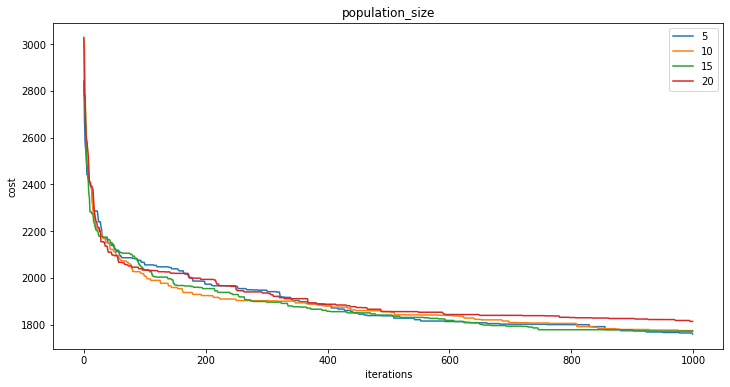

In [7]:
plot_parameter_impact('population_size', [5, 10, 15, 20], problem_medium)

[2148.3356357449,
 1782.0336223253,
 1779.0303941788998,
 1806.1079283684999,
 1814.1563314993002]

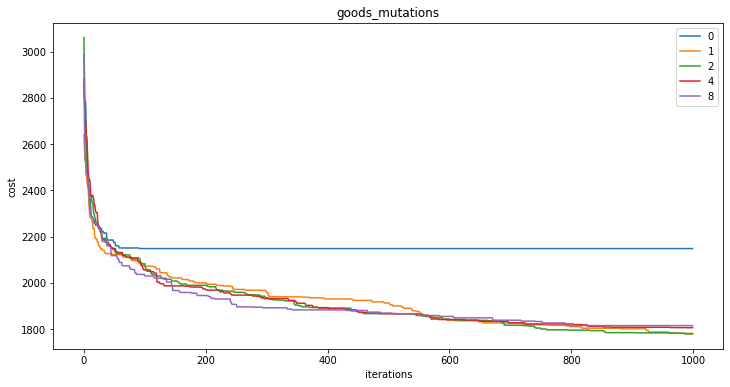

In [8]:
plot_parameter_impact('goods_mutations', [0, 1, 2, 4, 8], problem_medium)

[1913.2897763918,
 1791.5661889309,
 1976.3536882231,
 2156.1663913576995,
 2236.7661407018]

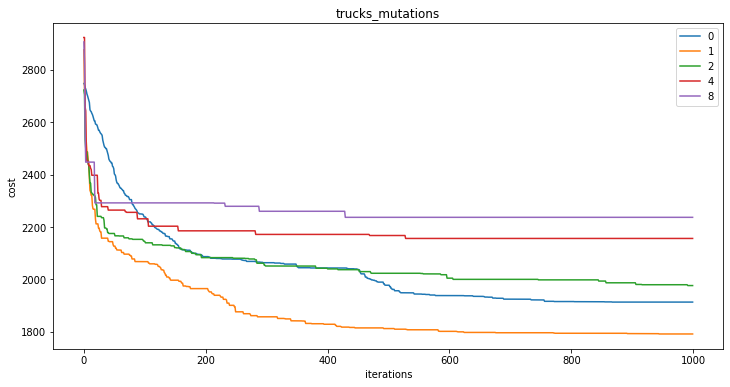

In [9]:
plot_parameter_impact('trucks_mutations', [0, 1, 2, 4, 8], problem_medium)

[1945.9211513435,
 1803.2647807070998,
 1783.5595465609,
 1766.3182787337,
 1778.4257767418999]

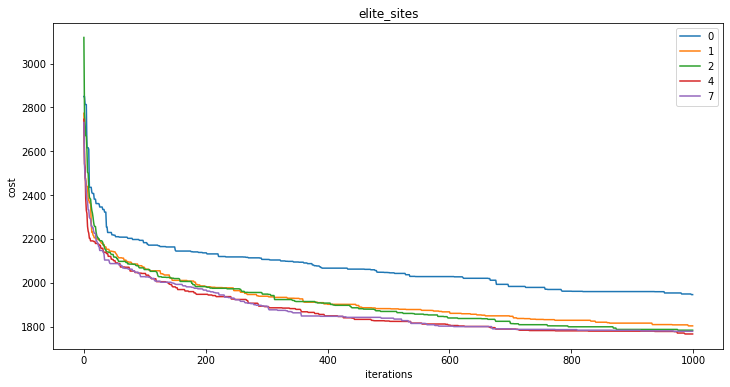

In [10]:
plot_parameter_impact('elite_sites', [0, 1, 2, 4, 7], problem_medium)

[1756.1901352871,
 1791.4786395775,
 1812.2812749822997,
 1761.6523944919,
 1771.1412367952998]

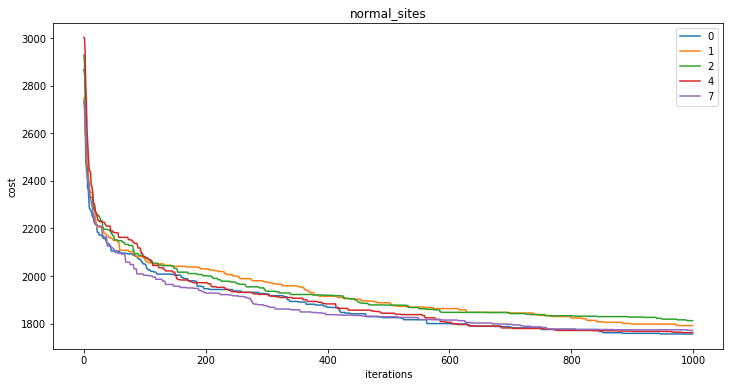

In [11]:
plot_parameter_impact('normal_sites', [0, 1, 2, 4, 7], problem_medium)

[1889.5685683959,
 1851.0530080622996,
 1803.5158307885001,
 1729.4080510867002,
 1713.6030525397]

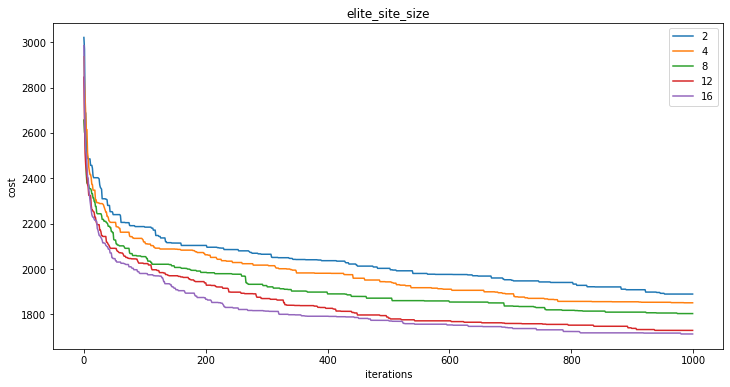

In [12]:
plot_parameter_impact('elite_site_size', [2, 4, 8, 12, 16], problem_medium)

[1750.7785325249001,
 1779.6638874304997,
 1773.5844209119002,
 1773.5649185022999,
 1761.5930123371]

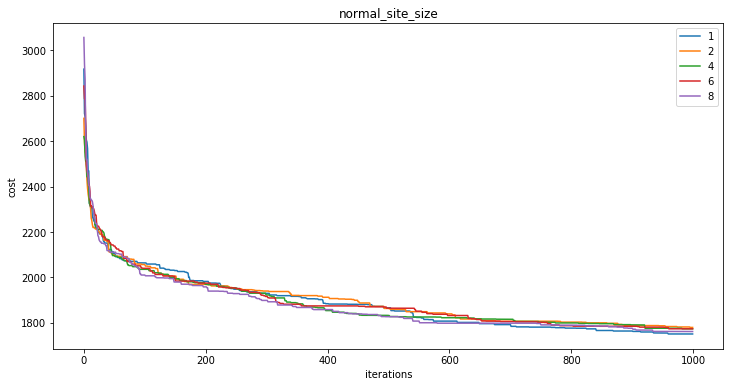

In [13]:
plot_parameter_impact('normal_site_size', [1, 2, 4, 6, 8], problem_medium)